In [1]:
print("Let's start !")

Let's start !


In [2]:
import torch
from torchvision import datasets, transforms

#Define transforms to normalizes the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

#Downloading and loading train set
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle = True)

#Downloading and loading test set
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size = 64, shuffle = True)

Building Model

In [3]:
from torch import nn, optim
import torch.nn.functional as F

class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.input = nn.Linear(784, 256)
        self.hdn_layer1 = nn.Linear(256, 128)
        self.hdn_layer2 = nn.Linear(128, 64)
        self.output = nn.Linear(64,10)
        
    def forward(self, x):
        #Flatten the dataset
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.input(x))
        x = F.relu(self.hdn_layer1(x))
        x = F.relu(self.hdn_layer2(x))
        x = F.log_softmax(self.output(x), dim =1)
        
        return x

In [4]:
c = nn.Linear(3,4)
c

Linear(in_features=3, out_features=4, bias=True)

In [5]:
model = Classifier()
images, labels = next(iter(testloader))
#t = images[12].view(images[12].shape[0], -1)
#t.shape
predict = torch.exp(model(images))
predict.shape

torch.Size([64, 10])

In [6]:
p = torch.exp(model(images[32]))
print(p)
max_value, max_index = p.topk(1, dim =1)
print(max_value, max_index)
print(labels[2])

tensor([[0.0948, 0.1136, 0.1060, 0.1103, 0.1123, 0.0952, 0.0924, 0.0884, 0.0890,
         0.0979]], grad_fn=<ExpBackward>)
tensor([[0.1136]], grad_fn=<TopkBackward>) tensor([[1]])
tensor(7)


In [7]:
q = predict.topk(1)
print(type(q))
print(len(q))

<class 'torch.return_types.topk'>
2


In [8]:
predict[:10]

tensor([[0.0963, 0.1128, 0.1085, 0.1061, 0.1096, 0.0973, 0.0917, 0.0932, 0.0911,
         0.0935],
        [0.0974, 0.1065, 0.1079, 0.1052, 0.1136, 0.0929, 0.0944, 0.0956, 0.0897,
         0.0968],
        [0.0986, 0.1086, 0.1074, 0.1046, 0.1144, 0.0949, 0.0908, 0.0931, 0.0913,
         0.0964],
        [0.0971, 0.1122, 0.1088, 0.1002, 0.1153, 0.0936, 0.0907, 0.0953, 0.0913,
         0.0956],
        [0.0959, 0.1093, 0.1078, 0.1048, 0.1125, 0.0956, 0.0928, 0.0921, 0.0925,
         0.0966],
        [0.0974, 0.1111, 0.1082, 0.1044, 0.1115, 0.0936, 0.0926, 0.0968, 0.0908,
         0.0936],
        [0.0980, 0.1147, 0.1059, 0.1053, 0.1137, 0.0904, 0.0964, 0.0936, 0.0867,
         0.0954],
        [0.0956, 0.1111, 0.1112, 0.1025, 0.1114, 0.0932, 0.0916, 0.0957, 0.0910,
         0.0967],
        [0.0934, 0.1121, 0.1066, 0.1075, 0.1130, 0.0960, 0.0940, 0.0910, 0.0880,
         0.0984],
        [0.0974, 0.1085, 0.1100, 0.1017, 0.1129, 0.0956, 0.0935, 0.0947, 0.0893,
         0.0965]], grad_fn=<

In [9]:
x = torch.arange(1,11)
print(x)
print(x.shape)

tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])
torch.Size([10])


In [10]:
print("This returns top values and top indices")
print(x.topk(1))

This returns top values and top indices
torch.return_types.topk(
values=tensor([10]),
indices=tensor([9]))


In [11]:
a, b = x.topk(1)
print(a)
print(b)

tensor([10])
tensor([9])


In [12]:
top_p, top_class = predict.topk(1, dim=1)
# Look at the most likely classes for the first 10 examples
print(top_p[:10, :])
print(top_class[:10,:])

tensor([[0.1128],
        [0.1136],
        [0.1144],
        [0.1153],
        [0.1125],
        [0.1115],
        [0.1147],
        [0.1114],
        [0.1130],
        [0.1129]], grad_fn=<SliceBackward>)
tensor([[1],
        [4],
        [4],
        [4],
        [4],
        [4],
        [1],
        [4],
        [4],
        [4]])


In [13]:
print(top_class.shape)
print(labels.shape)
print("Labels shape is 1, 64")

torch.Size([64, 1])
torch.Size([64])
Labels shape is 1, 64


In [14]:
eql = top_class == labels
print(eql.shape)
print(eql[1:3])

torch.Size([64, 64])
tensor([[False, False, False, False, False, False, False, False, False, False,
         False, False, False, False, False,  True, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,  True,
         False, False, False,  True, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True, False,
         False,  True,  True, False, False, False, False, False, False, False,
          True, False, False, False],
        [False, False, False, False, False, False, False, False, False, False,
         False, False, False, False, False,  True, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,  True,
         False, False, False,  True, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True, False,
         False,  True,  True, False, False, False, False, False, False, 

In [15]:
a = labels.view(top_class.shape)
print(a.shape)
print(a)
print(labels)
print(labels.shape)
print(top_class.shape)

torch.Size([64, 1])
tensor([[8],
        [0],
        [7],
        [7],
        [8],
        [6],
        [2],
        [7],
        [9],
        [5],
        [8],
        [9],
        [7],
        [2],
        [6],
        [4],
        [7],
        [6],
        [5],
        [8],
        [0],
        [9],
        [5],
        [1],
        [1],
        [5],
        [6],
        [9],
        [4],
        [4],
        [2],
        [1],
        [6],
        [4],
        [7],
        [6],
        [0],
        [1],
        [5],
        [5],
        [6],
        [8],
        [3],
        [0],
        [0],
        [6],
        [3],
        [2],
        [4],
        [1],
        [9],
        [4],
        [4],
        [8],
        [8],
        [1],
        [9],
        [3],
        [9],
        [1],
        [4],
        [6],
        [5],
        [1]])
tensor([8, 0, 7, 7, 8, 6, 2, 7, 9, 5, 8, 9, 7, 2, 6, 4, 7, 6, 5, 8, 0, 9, 5, 1,
        1, 5, 6, 9, 4, 4, 2, 1, 6, 4, 7, 6, 0, 1, 5, 5, 6, 8, 3, 0,

In [16]:
print(top_class.shape)
print(labels.shape)
print(a.shape)

torch.Size([64, 1])
torch.Size([64])
torch.Size([64, 1])


In [17]:
equals = top_class == labels.view(top_class.shape)

Now we need to calculate the percentage of correct predictions. equals has binary values, either 0 or 1. This means that if we just sum up all the values and divide by the number of values, we get the percentage of correct predictions. This is the same operation as taking the mean, so we can get the accuracy with a call to torch.mean. If only it was that simple. If you try torch.mean(equals), you'll get an error

In [18]:
accuracy = torch.mean(equals.type(torch.FloatTensor))
print('Accuracy:', accuracy.item()*100, '%')

Accuracy: 4.6875 %


In [19]:
model = Classifier()
loss_function = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)

epochs = 10
steps = 0
train_losses, test_losses = [], []
for i in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        optimizer.zero_grad()
        log_prediction = model(images)
        loss = loss_function(log_prediction, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    else:
        test_loss = 0
        accuracy = 0
        # Turning off gradients for validation, saves memory and computations
        with torch.no_grad():
            for images, labels in testloader:
                log_predict = model(images)
                test_loss += loss_function(log_predict, labels)
                
                ps = torch.exp(log_predict)
                top_value, top_class = ps.topk(1, dim = 1)
                equals = top_class == labels.view(top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
                
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))
        
        print("Epoch: {}/{}.. ".format(i+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

Epoch: 1/10..  Training Loss: 0.517..  Test Loss: 0.445..  Test Accuracy: 0.836
Epoch: 2/10..  Training Loss: 0.375..  Test Loss: 0.403..  Test Accuracy: 0.853
Epoch: 3/10..  Training Loss: 0.338..  Test Loss: 0.389..  Test Accuracy: 0.861
Epoch: 4/10..  Training Loss: 0.311..  Test Loss: 0.396..  Test Accuracy: 0.862
Epoch: 5/10..  Training Loss: 0.293..  Test Loss: 0.355..  Test Accuracy: 0.869
Epoch: 6/10..  Training Loss: 0.275..  Test Loss: 0.349..  Test Accuracy: 0.878
Epoch: 7/10..  Training Loss: 0.262..  Test Loss: 0.339..  Test Accuracy: 0.876
Epoch: 8/10..  Training Loss: 0.247..  Test Loss: 0.357..  Test Accuracy: 0.874
Epoch: 9/10..  Training Loss: 0.238..  Test Loss: 0.349..  Test Accuracy: 0.882
Epoch: 10/10..  Training Loss: 0.227..  Test Loss: 0.369..  Test Accuracy: 0.875


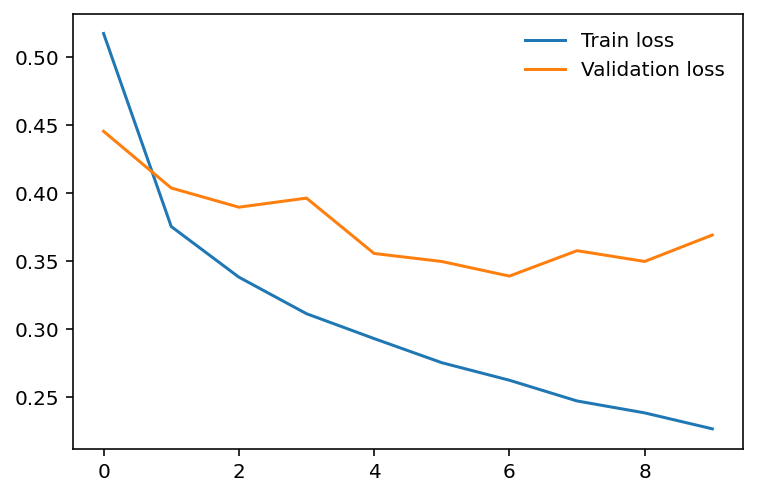

In [20]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt 

plt.plot(train_losses, label = 'Train loss')
plt.plot(test_losses, label = 'Validation loss')
plt.legend(frameon = False)

Droput

In [34]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

        # Dropout module with 0.2 drop probability
        self.dropout = nn.Dropout(p=0.2)

    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)

        # Now with dropout
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))

        # output so no dropout here
        x = F.log_softmax(self.fc4(x), dim=1)

        return x

In [36]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 10
steps = 0

train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        
        optimizer.zero_grad()
        
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    else:
        test_loss = 0
        accuracy = 0
        
        # Turn off gradients for validation, saves memory and computations
        with torch.no_grad():
            model.eval()
            for images, labels in testloader:
                log_ps = model(images)
                test_loss += criterion(log_ps, labels)
                
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
        
        model.train()
        
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(train_losses[-1]),
              "Test Loss: {:.3f}.. ".format(test_losses[-1]),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

Epoch: 1/10..  Training Loss: 0.608..  Test Loss: 0.520..  Test Accuracy: 0.810
Epoch: 2/10..  Training Loss: 0.489..  Test Loss: 0.436..  Test Accuracy: 0.840
Epoch: 3/10..  Training Loss: 0.456..  Test Loss: 0.443..  Test Accuracy: 0.834
Epoch: 4/10..  Training Loss: 0.432..  Test Loss: 0.403..  Test Accuracy: 0.857
Epoch: 5/10..  Training Loss: 0.421..  Test Loss: 0.418..  Test Accuracy: 0.851
Epoch: 6/10..  Training Loss: 0.418..  Test Loss: 0.432..  Test Accuracy: 0.854
Epoch: 7/10..  Training Loss: 0.412..  Test Loss: 0.388..  Test Accuracy: 0.865
Epoch: 8/10..  Training Loss: 0.401..  Test Loss: 0.388..  Test Accuracy: 0.860
Epoch: 9/10..  Training Loss: 0.395..  Test Loss: 0.390..  Test Accuracy: 0.860
Epoch: 10/10..  Training Loss: 0.391..  Test Loss: 0.390..  Test Accuracy: 0.865


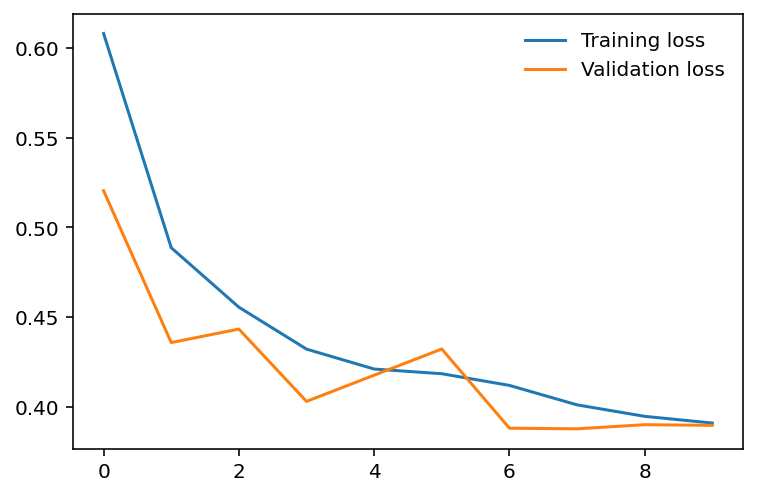

In [37]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

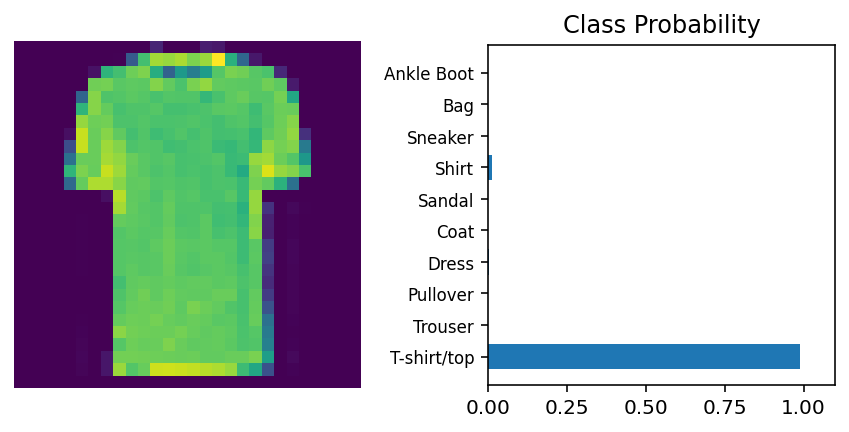

In [38]:
# Import helper module (should be in the repo)
import helper

# Test out your network!

model.eval()

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.view(1, 784)

# Calculate the class probabilities (softmax) for img
with torch.no_grad():
    output = model.forward(img)

ps = torch.exp(output)

# Plot the image and probabilities
helper.view_classify(img.view(1, 28, 28), ps, version='Fashion')

In [32]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.input = nn.Linear(784,256)
        self.hdn_layer1 = nn.Linear(256,128)
        self.hdn_layer2 = nn.Linear(128,64)
        self.output = nn.Linear(64,10)
        # Dropout module with 0.2 drop probability
        self.dropout = nn.Dropout(p = 0.2)
        
        def forwardpass(self,x):
            #Flatten the datasets
            x = x.view(x.shape[0], -1)
            #Implenting dropout in layers
            x = self.dropout(F.relu(self.input(x)))
            x = self.dropout(F.relu(self.hdn_layer1(x)))
            x = self.dropout(F.relu(self.hdn_layer2(x)))
            #For output we will not use dropout
            x = F.log_softmax(self.output(x), dim = 1)
            
            return x

In [33]:
model = Classifier()
loss_fun = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.01)

epocs = 10
steps = 0

train_losses, test_losses = [], []

for a in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        optimizer.zero_grad()
        pre = model(images)
        loss = loss_fun(pre, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        test_loss = 0
        accuracy = 0
        # Turn off gradients for validation, saves memory and computations
        with torch.no_grad():
            #Setting model Evalation mode
            model.eval()
            #Validation pass
            for images, labels in  testloader:
                l_predict = model(images)
                test_loss += loss_fun(l_predict, labels)
                
                ps = torch.exp(l_predict)
                top_value, top_class = ps.topk(1, dim = 1)
                equals = top_class == labels.view(top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
                
            model.train()
            
            train_losses.append(running_loss/len(trainloader))
            test_losses.append(test_loss/len(testloader))
            
            print("Epoch: {}/{}.. ".format(a+1, epochs),
              "Training Loss: {:.3f}.. ".format(train_losses[-1]),
              "Test Loss: {:.3f}.. ".format(test_losses[-1]),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -0.9843, -1.0000, -1.0000, -0.2941, -0.5059, -0.5294,
          -0.0039, -0.9529, -0.2863, -0.6471, -0.3176, -0.4039, -0.5765,
          -0.7098, -0.4824, -0.2235, -0.7020, -0.2471, -0.9451, -0.1294,
          -0.3882, -0.5922, -0.1922, -0.9765, -1.0000, -0.9922, -1.0000],
         [-1.0000, -0.9922, -1.0000, -1.0000,  0.7804,  0.3725,  0.6314,
           0.7098,  0.6000,  0.7098,  0.6471,  0.6078,  0.6157,  0.4980,
           0.6078,  0.6157,  0.5686,  0.6157,  0.7098,  0.6627,  0.7098,
           0.6314,  0.3255,  0.8275, -0.8118, -1.0000, -0.9843, -1.0000],
         [-1.0000, -0.9765, -1.0000, -1.0000,  0.4588,  0.1765,  0.2392,
           0.3333,  0.3176,  0.2000,  0.1216,  0